## **GPA #2: Classification**

### **1. Data Splitting**

#### 1.1 Split the dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('cleaned_crime_data.csv')

# Drop the column
data = data.drop(columns=['Datetime','AREA NAME', 'LOCATION', 'Weapon Used Cd'])

# Map 'Day of Week' to numbers (Monday = 1, Sunday = 7)
day_of_week_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
data['Day of Week'] = data['Day of Week'].map(day_of_week_mapping)

# Map 'Time_of_Day' (Day = 1, Night = 2)
time_of_day_mapping = {
    'Day': 0,
    'Night': 1
}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_mapping)

# Map 'Vict Sex ' ('M' = 1, 'X' = 3, 'F' = 2)
vict_sex_mapping = {
    'M' : 1,
    'X' : 3,
    'F' : 2
}
data['Vict Sex'] = data['Vict Sex'].map(vict_sex_mapping)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Vict Descent' column
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])

# Check for missing values in the dataset
missing_values = data.isnull().sum()
# print(missing_values[missing_values > 0])
# For categorical columns, you can fill NaNs with the most frequent value (mode)
data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)

# Display the first few rows to confirm the transformation
print(data.head())

   Day of Week  Month  Hour  Year  Time_of_Day  AREA      LAT       LON  \
0            7      3    21  2020            1     7  34.0375 -118.3506   
1            6      2    18  2020            1     1  34.0444 -118.2628   
2            3     11    17  2020            0     3  34.0210 -118.3002   
3            2      3    20  2020            1     9  34.1576 -118.4387   
4            1      8    12  2020            0     6  34.0944 -118.3277   

   Crm Cd                               Crm Cd Desc  Rpt Dist No  Premis Cd  \
0     510                          VEHICLE - STOLEN          784      101.0   
1     330                     BURGLARY FROM VEHICLE          182      128.0   
2     480                             BIKE - STOLEN          356      502.0   
3     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          964      405.0   
4     354                         THEFT OF IDENTITY          666      102.0   

   Vict Age  Vict Age Standardized  Vict Sex  Vict Descent  
0       0.0  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29580\3403465717.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)


In [4]:
# Check class distribution before splitting
print("\nInitial class distribution:")
print(data['Crm Cd'].value_counts())

# Define features and class label
X = data.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)  # Features
y = data['Crm Cd']  # Class label

# Filter out classes with fewer than 2 instances
value_counts = y.value_counts()
classes_to_keep = value_counts[value_counts >= 5].index
data_filtered = data[data['Crm Cd'].isin(classes_to_keep)]

# Redefine X and y after filtering
X = data_filtered.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data_filtered['Crm Cd']

# Split the dataset into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Combine the train and test splits for statistics
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Display statistics of the data split results
print("\nTraining set class distribution (proportions):")
print(train_data['Crm Cd'].value_counts(normalize=True) * 100)

print("\nTesting set class distribution (proportions):")
print(test_data['Crm Cd'].value_counts(normalize=True) * 100)


Initial class distribution:
Crm Cd
510    109906
624     74665
330     61012
354     60597
740     59410
        ...  
904         5
906         4
445         4
926         1
453         1
Name: count, Length: 140, dtype: int64

Training set class distribution (proportions):
Crm Cd
510.0    11.230716
624.0     7.629571
330.0     6.234453
354.0     6.192119
740.0     6.070811
           ...    
904.0     0.000584
349.0     0.000584
830.0     0.000584
432.0     0.000584
884.0     0.000584
Name: proportion, Length: 136, dtype: float64

Testing set class distribution (proportions):
Crm Cd
510.0    11.230781
624.0     7.629792
330.0     6.234630
354.0     6.192053
740.0     6.070794
           ...    
830.0     0.000681
485.0     0.000681
942.0     0.000681
446.0     0.000681
904.0     0.000341
Name: proportion, Length: 136, dtype: float64


#### 1.2 Implement 5-fold cross-validation in training data

In [5]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold with 5 splits
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified 5-fold cross-validation
fold = 1
for train_index, test_index in strat_k_fold.split(X, y):
    print(f"\nFold {fold}:")

    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Combine the train and test splits for statistics
    train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

    # Display statistics of the data split results
    print("Training set class distribution (proportions):")
    print(train_data['Crm Cd'].value_counts(normalize=True) * 100)

    print("Testing set class distribution (proportions):")
    print(test_data['Crm Cd'].value_counts(normalize=True) * 100)

    fold += 1



Fold 1:
Training set class distribution (proportions):
Crm Cd
510.0    11.230639
624.0     7.629641
330.0     6.234560
354.0     6.192154
740.0     6.070809
           ...    
924.0     0.000639
830.0     0.000639
884.0     0.000639
904.0     0.000511
432.0     0.000511
Name: proportion, Length: 136, dtype: float64
Testing set class distribution (proportions):
Crm Cd
510.0    11.231121
624.0     7.629621
330.0     6.234289
354.0     6.191882
740.0     6.070794
           ...    
948.0     0.000511
942.0     0.000511
830.0     0.000511
452.0     0.000511
884.0     0.000511
Name: proportion, Length: 136, dtype: float64

Fold 2:
Training set class distribution (proportions):
Crm Cd
510.0    11.230767
624.0     7.629641
330.0     6.234433
354.0     6.192154
740.0     6.070809
           ...    
884.0     0.000639
432.0     0.000639
485.0     0.000511
349.0     0.000511
904.0     0.000511
Name: proportion, Length: 136, dtype: float64
Testing set class distribution (proportions):
Crm Cd
510

### **2. Experiment with k-NN Classification Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both training and test data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

def calculate_metrics(y_true, y_pred):
    """Calculate all required metrics."""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    return metrics

def run_kfold_experiment(X, y, k_value, n_splits=5):
    """Run k-fold cross-validation for a specific k value."""
    knn = KNeighborsClassifier(n_neighbors=k_value)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_metrics = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        # Split data
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]

        # Impute missing values for this fold
        fold_imputer = SimpleImputer(strategy='mean')
        X_train_fold_imputed = pd.DataFrame(
            fold_imputer.fit_transform(X_train_fold),
            columns=X_train_fold.columns
        )
        X_val_fold_imputed = pd.DataFrame(
            fold_imputer.transform(X_val_fold),
            columns=X_val_fold.columns
        )

        # Train and predict
        knn.fit(X_train_fold_imputed, y_train_fold)
        y_pred = knn.predict(X_val_fold_imputed)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred)
        metrics['fold'] = fold
        fold_metrics.append(metrics)

    return pd.DataFrame(fold_metrics)

# Step 1: Define k values to experiment with
k_values = [5, 7, 11, 15, 21]  # Not too small, not too large

# Dictionary to store results for all k values
all_results = {}

print("\nStarting k-NN experiments with 5-fold cross-validation...")
print("\nStep 2 & 3: Running cross-validation and calculating metrics for each k value")

# Run experiments for each k value
for k in k_values:
    print(f"\nExperimenting with k={k}")
    results_df = run_kfold_experiment(X_train, y_train, k)
    all_results[k] = results_df

    print(f"\nResults for k={k}:")
    print("\nMetrics for each fold:")
    print(results_df.round(4))

    print("\nAverage metrics across folds:")
    mean_metrics = results_df.mean().round(4)
    std_metrics = results_df.std().round(4)
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print(f"{metric}: {mean_metrics[metric]} (±{std_metrics[metric]})")

# Step 4 & 7: Analyze results and find best k value
print("\nStep 4 & 7: Analyzing results across all k values")

# Calculate mean performance for each k value
summary_results = {}
for k, results in all_results.items():
    summary_results[k] = results.mean()[['accuracy', 'precision', 'recall', 'f1']]

summary_df = pd.DataFrame(summary_results).T
print("\nMean performance metrics for each k value:")
print(summary_df.round(4))

# Find best k value based on F1 score
best_k = summary_df['f1'].idxmax()
print(f"\nBest k value based on F1 score: {best_k}")

# Step 8: Train final model with best k value on full training data and evaluate on test set
print("\nStep 8: Evaluating best model on test set")
final_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the imputed training data
final_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_test_pred = final_model.predict(X_test_imputed)

# Calculate final metrics
final_metrics = calculate_metrics(y_test, y_test_pred)

print("\nFinal model performance on test set:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Starting k-NN experiments with 5-fold cross-validation...

Step 2 & 3: Running cross-validation and calculating metrics for each k value

Experimenting with k=5



Missing values in dataset:
Premis Cd    15
dtype: int64

Sample of transformed data:
   Day of Week  Month  Hour  Year  Time_of_Day  AREA      LAT       LON  \
0            7      3    21  2020            1     7  34.0375 -118.3506   
1            6      2    18  2020            1     1  34.0444 -118.2628   
2            3     11    17  2020            0     3  34.0210 -118.3002   
3            2      3    20  2020            1     9  34.1576 -118.4387   
4            1      8    12  2020            0     6  34.0944 -118.3277   

   Crm Cd                               Crm Cd Desc  Rpt Dist No  Premis Cd  \
0     510                          VEHICLE - STOLEN          784      101.0   
1     330                     BURGLARY FROM VEHICLE          182      128.0   
2     480                             BIKE - STOLEN          356      502.0   
3     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          964      405.0   
4     354                         THEFT OF IDENTITY          666    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31632\3561373843.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)


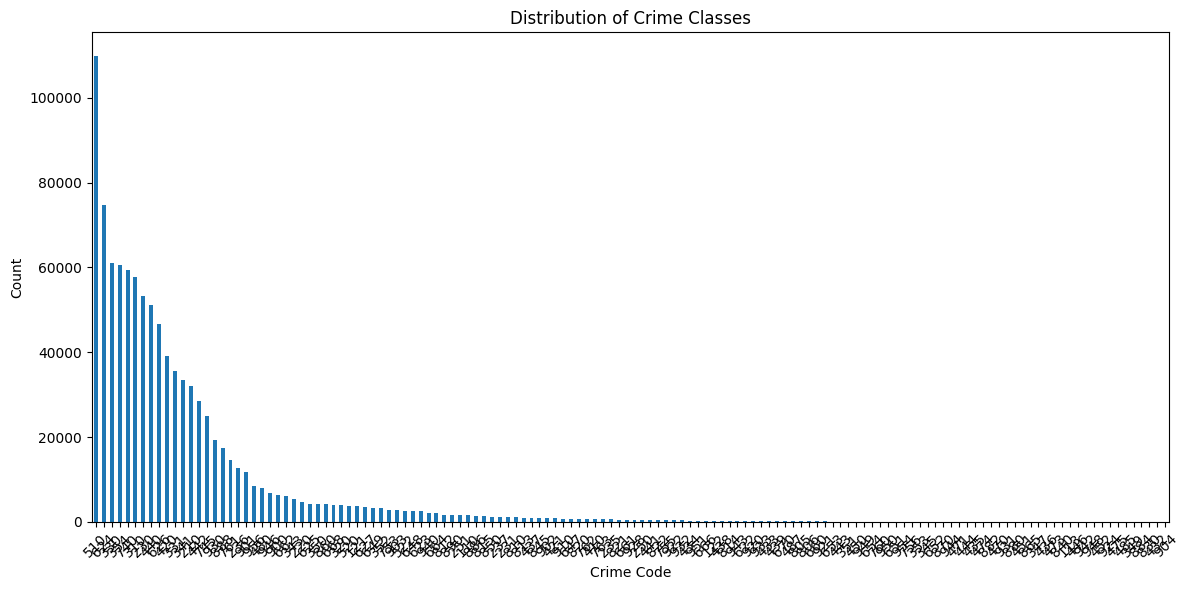


Cross-validation fold statistics:


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Fold 1 class distribution (proportions):
Crm Cd
510    11.230813
624     7.629537
330     6.233988
354     6.191654
740     6.071223
         ...    
924     0.000730
446     0.000730
475     0.000730
473     0.000730
113     0.000730
Name: proportion, Length: 134, dtype: float64

Fold 2 class distribution (proportions):
Crm Cd
510    11.230813
624     7.629537
330     6.233988
354     6.192384
740     6.070493
         ...    
347     0.000730
432     0.000730
948     0.000730
113     0.000730
931     0.000730
Name: proportion, Length: 136, dtype: float64

Fold 3 class distribution (proportions):
Crm Cd
510    11.230895
624     7.629593
330     6.234763
354     6.192430
740     6.070537
         ...    
347     0.000730
948     0.000730
865     0.000730
446     0.000730
452     0.000730
Name: proportion, Length: 134, dtype: float64

Fold 4 class distribution (proportions):
Crm Cd
510    11.230895
624     7.629593
330     6.234763
354     6.192430
740     6.070537
         ...    
475

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
data = pd.read_csv('cleaned_crime_data.csv')

# 2. Drop unnecessary columns
data = data.drop(columns=['Datetime','AREA NAME', 'LOCATION', 'Weapon Used Cd'])

# 3. Transform categorical variables
# Map 'Day of Week' to numbers (Monday = 1, Sunday = 7)
day_of_week_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
data['Day of Week'] = data['Day of Week'].map(day_of_week_mapping)

# Map 'Time_of_Day' (Day = 0, Night = 1)
time_of_day_mapping = {
    'Day': 0,
    'Night': 1
}
data['Time_of_Day'] = data['Time_of_Day'].map(time_of_day_mapping)

# Map 'Vict Sex' (M = 1, X = 3, F = 2)
vict_sex_mapping = {
    'M': 1,
    'X': 3,
    'F': 2
}
data['Vict Sex'] = data['Vict Sex'].map(vict_sex_mapping)

# 4. Encode 'Vict Descent' using LabelEncoder
label_encoder = LabelEncoder()
data['Vict Descent'] = label_encoder.fit_transform(data['Vict Descent'])

# 5. Handle missing values
missing_values = data.isnull().sum()
print("\nMissing values in dataset:")
print(missing_values[missing_values > 0])
data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)

# 6. Display sample of transformed data
print("\nSample of transformed data:")
print(data.head())

# 7. Check class distribution
print("\nInitial class distribution:")
print(data['Crm Cd'].value_counts())

# 8. Prepare features and target
X = data.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)  # Features
y = data['Crm Cd']  # Class label

# 9. Filter out rare classes (less than 5 instances)
value_counts = y.value_counts()
classes_to_keep = value_counts[value_counts >= 5].index
data_filtered = data[data['Crm Cd'].isin(classes_to_keep)]

# 10. Redefine X and y after filtering
X = data_filtered.drop(['Crm Cd', 'Crm Cd Desc'], axis=1)
y = data_filtered['Crm Cd']

# 11. Visualize class distribution
plt.figure(figsize=(12, 6))
y.value_counts().plot(kind='bar')
plt.title('Distribution of Crime Classes')
plt.xlabel('Crime Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. Split data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 13. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 14. Implement 5-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to display fold statistics
def display_fold_stats(X, y, fold_number, indices):
    fold_data = pd.DataFrame({'Crm Cd': y.iloc[indices]})
    print(f"\nFold {fold_number} class distribution (proportions):")
    print(fold_data['Crm Cd'].value_counts(normalize=True) * 100)
    return fold_data['Crm Cd'].value_counts(normalize=True)

# Collect statistics for each fold
fold_stats = []
print("\nCross-validation fold statistics:")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    fold_dist = display_fold_stats(X_train_scaled, y_train, fold, val_idx)
    fold_stats.append(fold_dist)

# Compare distributions across folds
fold_distributions = pd.concat(fold_stats, axis=1)
fold_distributions.columns = [f'Fold {i}' for i in range(1, 6)]
print("\nComparison of class distributions across folds:")
print(fold_distributions)

# 15. Display overall statistics
print("\nOverall Data Split Statistics:")
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set class distribution (proportions):")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set class distribution (proportions):")
print(y_test.value_counts(normalize=True) * 100)

# 16. Save processed datasets
train_data = pd.DataFrame({
    'y': y_train,
    **{f'feature_{i}': X_train_scaled[col] for i, col in enumerate(X_train.columns)}
})

test_data = pd.DataFrame({
    'y': y_test,
    **{f'feature_{i}': X_test_scaled[col] for i, col in enumerate(X_test.columns)}
})

print("\nProcessed datasets saved and ready for model training")

### **3. Experiment with Naïve Bayes Classification Model**

### **4. Experiment with Logistic Regression Classification Model**

### **5. Experiment with SVM Classification Model**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Subsample data jika dataset terlalu besar
sample_size = 10000  # Sesuaikan dengan kebutuhan
if len(X) > sample_size:
    random_indices = np.random.choice(len(X), sample_size, replace=False)
    X_sampled = X.iloc[random_indices]
    y_sampled = y.iloc[random_indices]
else:
    X_sampled = X
    y_sampled = y

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

# Kembalikan parameter sesuai awal
kernels = ['linear', 'rbf']
C_values = [0.1, 1.0, 10.0]

# Initialize dictionary to store results
results = {}

# Initialize StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Optimasi fungsi metric calculation
def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }
    
    if y_pred_proba is not None:
        try:
            y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
            metrics['roc_auc'] = roc_auc_score(y_true_bin, y_pred_proba, average='weighted', multi_class='ovr')
        except:
            metrics['roc_auc'] = np.nan
    
    return metrics

# Tracking progress
total_combinations = len(kernels) * len(C_values)
current_combination = 0

for kernel in kernels:
    for C in C_values:
        current_combination += 1
        print(f"\nProgress: Combination {current_combination}/{total_combinations}")
        print(f"Evaluating SVM with kernel={kernel}, C={C}")
        
        fold_metrics = []
        
        # Optimasi SVM dengan cache_size dan max_iter
        svm_base = SVC(
            kernel=kernel, 
            C=C, 
            probability=True,
            cache_size=2000,  # Increase cache size
            max_iter=1000,    # Limit iterations
            random_state=42
        )
        
        for fold, (train_idx, val_idx) in enumerate(strat_k_fold.split(X_scaled, data['Vict Sex'].iloc[random_indices]), 1):
            print(f"  Processing fold {fold}/5...", end='\r')
            
            # Split data
            X_train_fold = X_scaled[train_idx]
            X_val_fold = X_scaled[val_idx]
            y_train_fold = y_sampled.iloc[train_idx]
            y_val_fold = y_sampled.iloc[val_idx]
            
            # Train model
            svm_model = OneVsRestClassifier(svm_base)
            svm_model.fit(X_train_fold, y_train_fold)
            
            # Predictions
            y_pred = svm_model.predict(X_val_fold)
            y_pred_proba = svm_model.predict_proba(X_val_fold)
            
            # Metrics
            fold_result = calculate_metrics(y_val_fold, y_pred, y_pred_proba)
            fold_metrics.append(fold_result)
        
        print("\nCalculating average metrics...")
        # Calculate average metrics
        avg_metrics = {}
        for metric in fold_metrics[0].keys():
            values = [fold[metric] for fold in fold_metrics]
            avg_metrics[metric] = np.mean([v for v in values if not np.isnan(v)])
            std_metrics = np.std([v for v in values if not np.isnan(v)])
            print(f"{metric}: {avg_metrics[metric]:.4f} (±{std_metrics:.4f})")
        
        results[(kernel, C)] = {
            'fold_metrics': fold_metrics,
            'avg_metrics': avg_metrics
        }

print("\nFinding best parameters...")
# Find best parameters
best_score = 0
best_params = None

for params, result in results.items():
    avg_f1 = result['avg_metrics']['f1']
    if avg_f1 > best_score:
        best_score = avg_f1
        best_params = params

print(f"\nBest model parameters:")
print(f"Kernel: {best_params[0]}")
print(f"C: {best_params[1]}")
print(f"Best average F1-score: {best_score:.4f}")

print("\nTraining final model...")
# Train final model on full training data
best_model = OneVsRestClassifier(SVC(
    kernel=best_params[0], 
    C=best_params[1], 
    probability=True,
    cache_size=2000,
    max_iter=1000,
    random_state=42
))

# Scale test data
X_test_scaled = scaler.transform(X_test)

# Final training and prediction
best_model.fit(X_scaled, y_sampled)
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_proba = best_model.predict_proba(X_test_scaled)

print("\nCalculating final metrics...")
# Final metrics
final_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_proba)

print("\nFinal Test Set Results:")
for metric, value in final_metrics.items():
    if not np.isnan(value):
        print(f"{metric}: {value:.4f}")


Progress: Combination 1/6
Evaluating SVM with kernel=linear, C=0.1


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

# Step 1: Define kernel types and C parameters
kernels = ['linear', 'rbf']
C_values = [0.1, 1.0, 10.0]  # You can adjust these values

# Initialize dictionary to store results
results = {}

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }
    
    # Calculate ROC AUC for multiclass
    if y_pred_proba is not None:
        # Binarize the labels for ROC AUC calculation
        y_true_bin = label_binarize(y_true, classes=np.unique(y))
        metrics['roc_auc'] = roc_auc_score(y_true_bin, y_pred_proba, average='weighted', multi_class='ovr')
    
    return metrics

# Step 2-6: Experiment with different combinations
for kernel in kernels:
    for C in C_values:
        print(f"\nEvaluating SVM with kernel={kernel}, C={C}")
        
        # Initialize lists to store fold results
        fold_metrics = []
        
        # Perform 5-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(strat_k_fold.split(X_scaled, data['Vict Sex']), 1):
            # Split data
            X_train_fold = X_scaled[train_idx]
            X_val_fold = X_scaled[val_idx]
            y_train_fold = y.iloc[train_idx]
            y_val_fold = y.iloc[val_idx]
            
            # Train SVM model
            svm_model = OneVsRestClassifier(SVC(kernel=kernel, C=C, probability=True))
            svm_model.fit(X_train_fold, y_train_fold)
            
            # Make predictions
            y_pred = svm_model.predict(X_val_fold)
            y_pred_proba = svm_model.predict_proba(X_val_fold)
            
            # Calculate metrics
            fold_result = calculate_metrics(y_val_fold, y_pred, y_pred_proba)
            fold_metrics.append(fold_result)
            
            print(f"\nFold {fold} Results:")
            for metric, value in fold_result.items():
                print(f"{metric}: {value:.4f}")
        
        # Calculate average metrics across folds
        avg_metrics = {}
        for metric in fold_metrics[0].keys():
            avg_metrics[metric] = np.mean([fold[metric] for fold in fold_metrics])
            std_metrics = np.std([fold[metric] for fold in fold_metrics])
            print(f"\nAverage {metric}: {avg_metrics[metric]:.4f} (±{std_metrics:.4f})")
        
        # Store results
        results[(kernel, C)] = {
            'fold_metrics': fold_metrics,
            'avg_metrics': avg_metrics
        }

# Step 7: Find the best model configuration
best_score = 0
best_params = None

for params, result in results.items():
    avg_f1 = result['avg_metrics']['f1']
    if avg_f1 > best_score:
        best_score = avg_f1
        best_params = params

print(f"\nBest model parameters:")
print(f"Kernel: {best_params[0]}")
print(f"C: {best_params[1]}")
print(f"Best average F1-score: {best_score:.4f}")

# Step 8: Train the best model on full training data and evaluate on test set
best_model = OneVsRestClassifier(SVC(kernel=best_params[0], C=best_params[1], probability=True))

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit on full training data
best_model.fit(X_scaled, y)

# Make predictions on test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_proba = best_model.predict_proba(X_test_scaled)

# Calculate final metrics
final_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_proba)

print("\nFinal Test Set Results:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Evaluating SVM with kernel=linear, C=0.1


### **6. Experiment with Decision Tree (DT) Classification Model**

### **7. Experiment with Back Propagation Neural Network (BPNN) Classification Model**